<a href="https://colab.research.google.com/github/Mateoskix/AI/blob/main/Modelos_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Cargamos los datos
data_cat = pd.read_excel("datos_categoricos.xlsx", index_col=0)
data_num = pd.read_excel("datos_numéricos.xlsx", index_col=0)

In [ ]:
for col in data_cat.columns:
    data_cat[col] = data_cat[col].astype('category')

In [ ]:
data_cat.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,"[28.0, 44.333)",M,ATA,"[120.0, 160.0)","[201.0, 402.0)","[0.0, 0.333)",Normal,"[154.667, 202.142)",N,"[-2.6, 0.333)",No
1,"[44.333, 60.667)",F,NAP,"[160.0, 200.12)","[0.0, 201.0)","[0.0, 0.333)",Normal,"[154.667, 202.142)",N,"[0.333, 3.267)",Si
2,"[28.0, 44.333)",M,ATA,"[120.0, 160.0)","[201.0, 402.0)","[0.0, 0.333)",ST,"[60.0, 107.333)",N,"[-2.6, 0.333)",No
3,"[44.333, 60.667)",F,ASY,"[120.0, 160.0)","[201.0, 402.0)","[0.0, 0.333)",Normal,"[107.333, 154.667)",Y,"[0.333, 3.267)",Si
4,"[44.333, 60.667)",M,NAP,"[120.0, 160.0)","[0.0, 201.0)","[0.0, 0.333)",Normal,"[107.333, 154.667)",N,"[-2.6, 0.333)",No


In [ ]:
data_num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,0.244898,0.500000,0.479270,0,0.788732,0.295455,0,1,0,0,1,0,0,0,1,0
1,0.428571,0.666667,0.298507,0,0.676056,0.409091,1,0,0,0,0,1,0,0,1,0
2,0.183673,0.416667,0.469320,0,0.267606,0.295455,0,1,0,0,1,0,0,0,0,1
3,0.408163,0.483333,0.354892,0,0.338028,0.465909,1,0,1,1,0,0,0,0,1,0
4,0.530612,0.583333,0.323383,0,0.436620,0.295455,0,1,0,0,0,1,0,0,1,0


#División 70-30 - Categoricos

<Axes: xlabel='HeartDisease'>

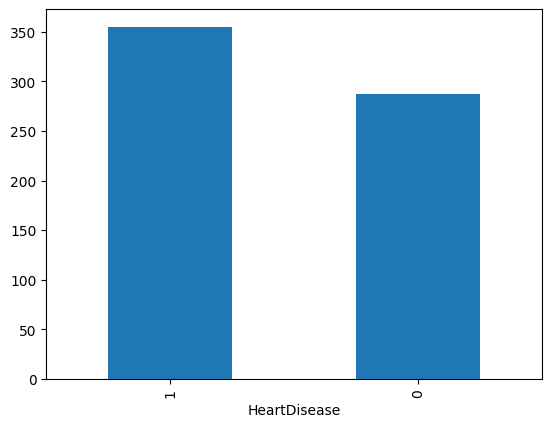

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data_cat = pd.get_dummies(data_cat, columns=['Age','RestingBP', 'RestingECG', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], drop_first=False)
data_cat = pd.get_dummies(data_cat, columns=['Sex','ExerciseAngina'], drop_first=True)

labelencoder = LabelEncoder()
data_cat["HeartDisease"]=labelencoder.fit_transform(data_cat["HeartDisease"])

X = data_cat.drop("HeartDisease", axis = 1) # Variables predictoras
Y = data_cat['HeartDisease'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

#Random Forest y Arbol

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(min_samples_leaf=2)

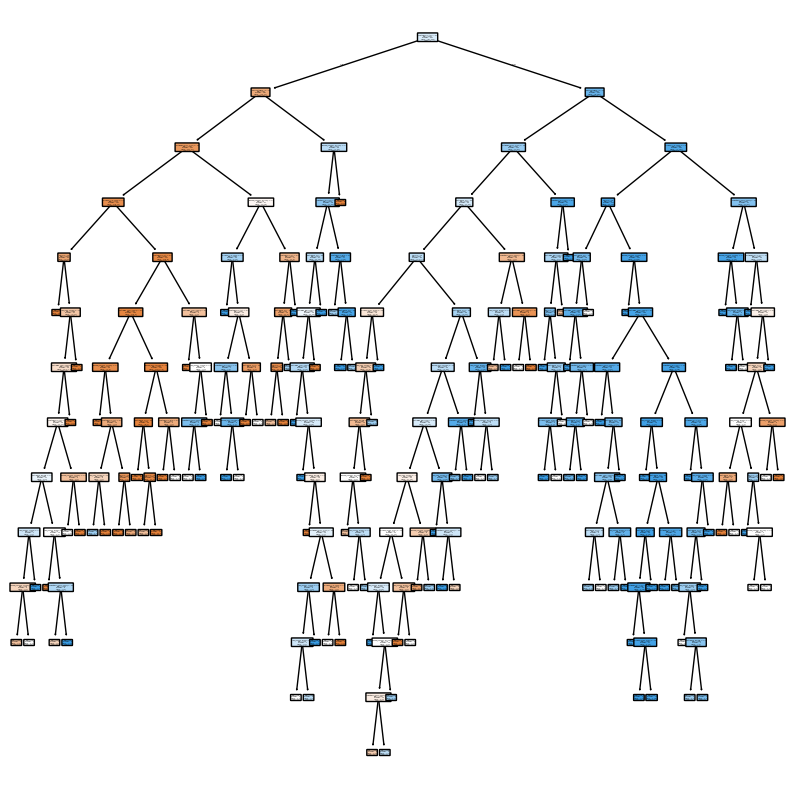

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

              precision    recall  f1-score   support

          No       0.65      0.75      0.70       123
          Si       0.77      0.68      0.72       153

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.72      0.71      0.71       276



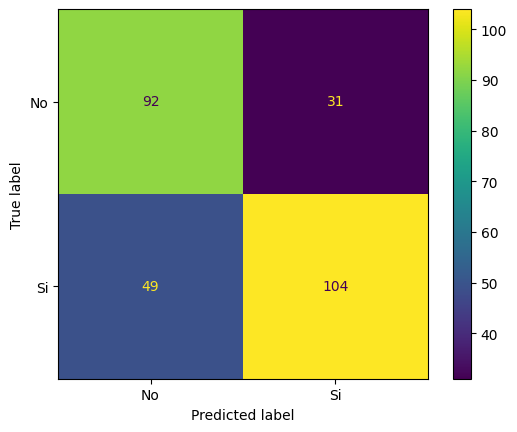

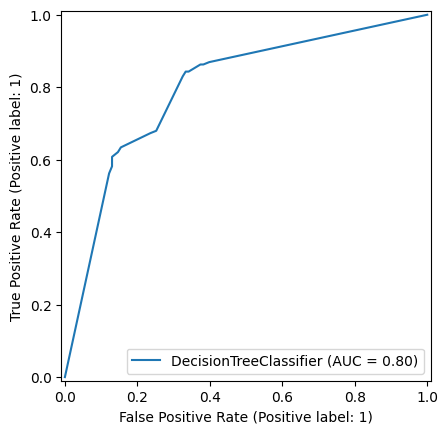

In [ ]:
#Precision, Recall, f1, exactitud
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30%

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))
disp.plot()
metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

              precision    recall  f1-score   support

          No       0.73      0.72      0.72       123
          Si       0.77      0.78      0.78       153

    accuracy                           0.75       276
   macro avg       0.75      0.75      0.75       276
weighted avg       0.75      0.75      0.75       276



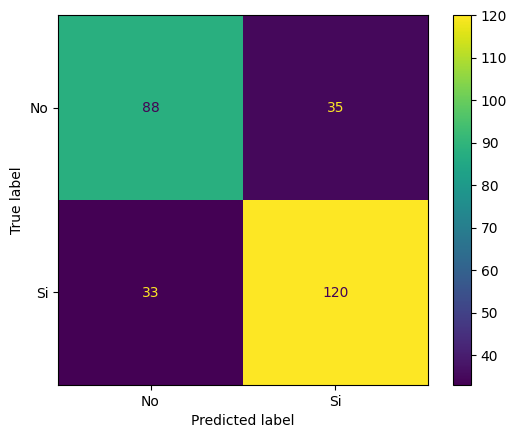

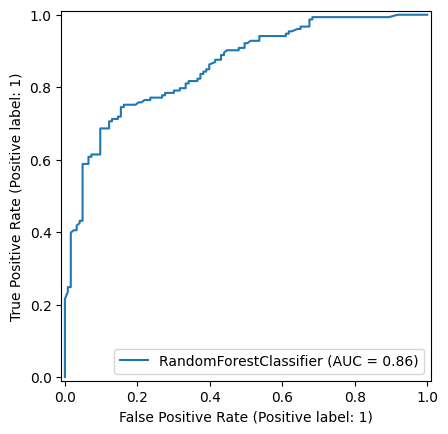

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier(min_samples_leaf=2, random_state=0, n_estimators=100)
modelrf_fit = modelrf.fit(X_train, Y_train)

Y_pred = modelrf.predict(X_test) #30%

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))
disp.plot()
metrics.RocCurveDisplay.from_estimator(modelrf,X_test, Y_test)

#División 70-30 Numéricos

<Axes: xlabel='HeartDisease'>

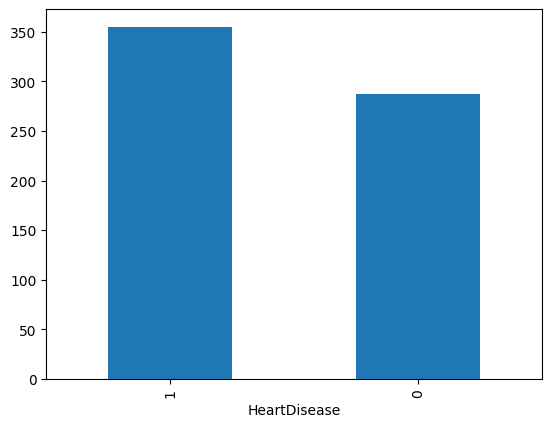

In [ ]:
X = data_num.drop("HeartDisease", axis = 1) # Variables predictoras
Y = data_num['HeartDisease'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       123
           1       0.82      0.76      0.79       153

    accuracy                           0.78       276
   macro avg       0.77      0.78      0.77       276
weighted avg       0.78      0.78      0.78       276



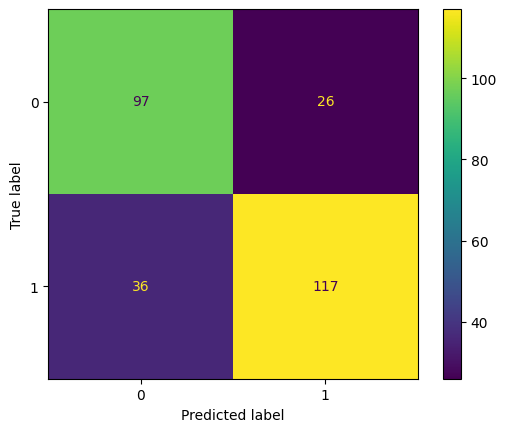

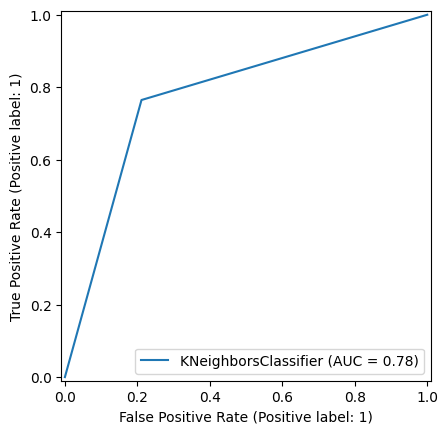

In [ ]:
#KNN
from sklearn.neighbors  import KNeighborsClassifier
modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)


              precision    recall  f1-score   support

           0       0.83      0.73      0.78       123
           1       0.80      0.88      0.84       153

    accuracy                           0.81       276
   macro avg       0.81      0.80      0.81       276
weighted avg       0.81      0.81      0.81       276



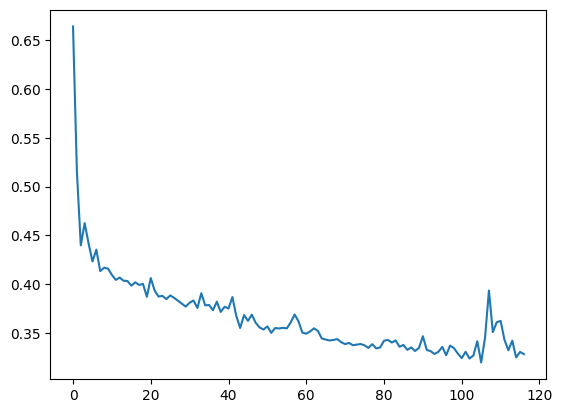

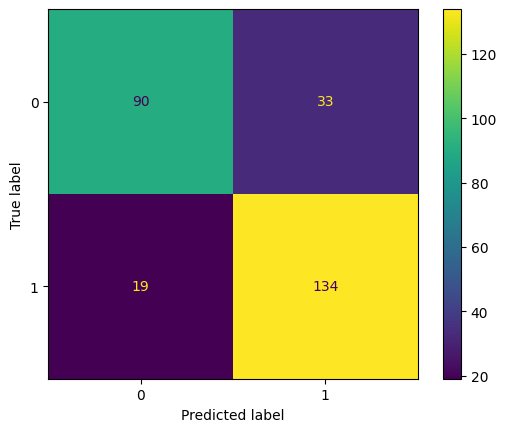

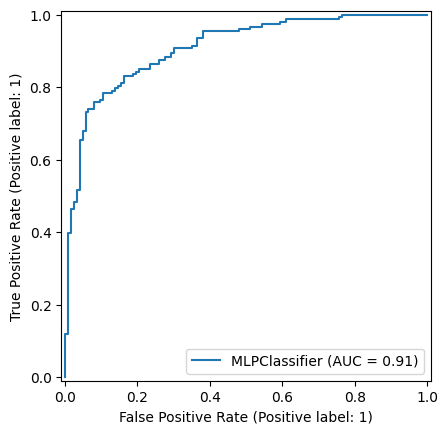

In [ ]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       123
           1       0.85      0.88      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.85       276
weighted avg       0.85      0.85      0.85       276



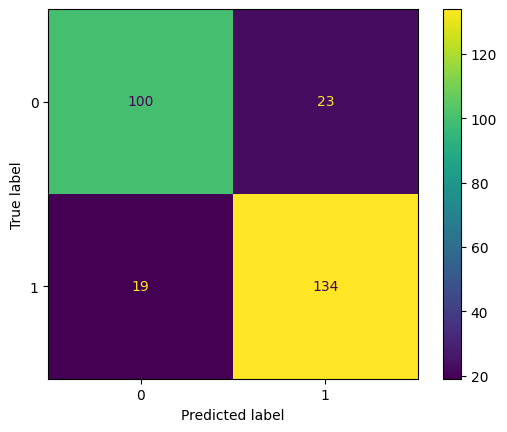

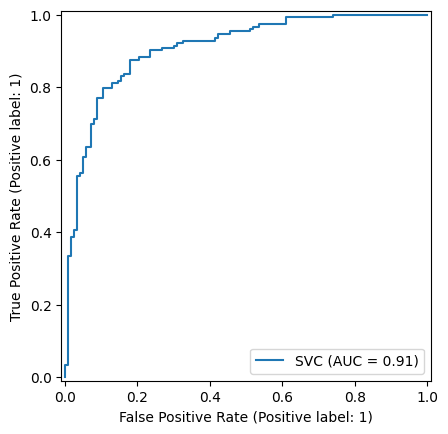

In [ ]:
#SVM
from sklearn.svm import SVC # SVR

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

#Conclusión Calidad Modelos
Guiandonos con la curva ROC todos los modelos dan muy buenos resultados siendo el mas bajo el de KNN con un área de aproximado 0.75 que aunque no es el mejor sigue estando en el limite inferior de lo aceptable, de resto los modelos se comportan muy similar con áreas siempre alrededor de los 0.90 siendo red neuronal y random forest las mejores, estos buenos resultados denotan una muy buena calidad en los datos de entrada y el proceso de calidad.

#Hiperparametrización Mejor Modelo: Red Neuronal

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier()


# Definir los parametros
random_state=[3] #Semilla para generar número pseudoaleatorios
solver=['sgd'] # Regla de aprendizaje ['adam','sgd','lbfgs']
learning_rate=['constant','adaptive'] #tasa de aprendizaje
learning_rate_init=[0.2, 0.5, 1.0, 1.5] #valor tasa de aprendizaje
momentum=[0.3, 0.5, 1.0] #momentum
activation=['identity','logistic', 'relu'] #'identity’, ‘logistic’, ‘tanh’, ‘relu’
hidden_layer_sizes=[4, 20,100,[8, 20]] # neuronas de la capa oculta (input+output/2)
max_iter = [100, 200,500] #iteraciones

#Grid
param_grid = dict(random_state=random_state,solver=solver,activation=activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate=learning_rate,
                  learning_rate_init=learning_rate_init, momentum=momentum)
grid = GridSearchCV(estimator=modelNN, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3)
grid.fit(X_train, Y_train)

#Mejor modelo
modelNN= grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
114 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
114 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 751, in fit
    return self._fit(X, y, incremental=False)
  File "/usr

In [ ]:
print( grid.best_params_)

{'activation': 'identity', 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.2, 'max_iter': 200, 'momentum': 0.3, 'random_state': 3, 'solver': 'sgd'}


In [ ]:
Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

In [ ]:
import pickle
filename = 'modelNN.pkl'
variables= X.columns._values
pickle.dump([modelNN,labelencoder,variables], open(filename, 'wb')) #write